# Regression: Predict Stock Market Returns

https://www.kaggle.com/c/the-winton-stock-market-challenge/data

### Data fields (Original Competition)
- Feature_1 to Feature_25: different features relevant to prediction
- Ret_MinusTwo:  this is the return from the close of trading on day D-2 to the close of trading on day D-1 (i.e. 1 day)
- Ret_MinusOne: this is the return from the close of trading on day D-1 to the point at which the intraday returns start on day D (approximately 1/2 day)
- Ret_2 to Ret_120: these are returns over approximately one minute on day D. Ret_2 is the return between t=1 and t=2. 
- Ret_121 to Ret_180: intraday returns over approximately one minute on day D. These are the target variables you need to predict as {id}_{1-60}. 
- Ret_PlusOne: this is the return from the time Ret_180 is measured on day D to the close of trading on day D+1. (approximately 1 day). This is a target variable you need to predict as {id}_61. 
- Ret_PlusTwo: this is the return from the close of trading on day D+1 to the close of trading on day D+2 (i.e. 1 day) This is a target variable you need to predict as {id}_62. 
- Weight_Intraday: weight used to evaluate intraday return predictions Ret 121 to 180
- Weight_Daily: weight used to evaluate daily return predictions (Ret_PlusOne and Ret_PlusTwo).

### Data fields (Simplified)

- Feature_1 to Feature_5: different features relevant to prediction
- Ret_MinusTwo:  this is the return from the close of trading on day D-2 to the close of trading on day D-1 (i.e. 1 day)
- Ret_MinusOne: this is the return from the close of trading on day D-1 to the point at which the intraday returns start on day D (approximately 1/2 day)
- Ret_2: return between t=1 and t=2

Target Variable: Ret_3

In [ ]:
# conda install pandas seaborn matplotlib

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [30]:
df = pd.read_csv('../../data/winton-stock-market/train.csv',
                 usecols=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
                          'Ret_MinusTwo', 'Ret_MinusOne', 'Ret_2', 'Ret_3'])
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3
0,NaN,NaN,NaN,NaN,8.0,0.055275,-0.010770,0.000003,-0.000734
1,NaN,NaN,NaN,NaN,3.0,0.009748,0.002987,-0.000487,0.000475
2,NaN,-0.696727,0.739591,-0.167928,9.0,0.003077,0.006181,-0.000782,-0.000402
3,NaN,-0.694350,1.568248,0.479073,5.0,0.000984,0.014106,0.000277,-0.000088
4,6.0,-1.736489,2.765531,1.245280,7.0,-0.018224,0.011065,-0.001232,0.000002


In [31]:
df.columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Ret_MinusTwo', 'Ret_MinusOne', 'Ret_2', 'Ret_3'],
      dtype='object')

## Data Cleaning

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 9 columns):
Feature_1       6687 non-null float64
Feature_2       30854 non-null float64
Feature_3       38763 non-null float64
Feature_4       32279 non-null float64
Feature_5       40000 non-null float64
Ret_MinusTwo    40000 non-null float64
Ret_MinusOne    40000 non-null float64
Ret_2           38946 non-null float64
Ret_3           38755 non-null float64
dtypes: float64(9)
memory usage: 2.7 MB


In [33]:
df[df.isna().values]

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3
0,NaN,NaN,NaN,NaN,8.0,0.055275,-0.010770,2.954272e-06,-0.000734
0,NaN,NaN,NaN,NaN,8.0,0.055275,-0.010770,2.954272e-06,-0.000734
0,NaN,NaN,NaN,NaN,8.0,0.055275,-0.010770,2.954272e-06,-0.000734
0,NaN,NaN,NaN,NaN,8.0,0.055275,-0.010770,2.954272e-06,-0.000734
1,NaN,NaN,NaN,NaN,3.0,0.009748,0.002987,-4.871459e-04,0.000475
1,NaN,NaN,NaN,NaN,3.0,0.009748,0.002987,-4.871459e-04,0.000475
1,NaN,NaN,NaN,NaN,3.0,0.009748,0.002987,-4.871459e-04,0.000475
1,NaN,NaN,NaN,NaN,3.0,0.009748,0.002987,-4.871459e-04,0.000475
2,NaN,-0.696727,0.739591,-0.167928,9.0,0.003077,0.006181,-7.822703e-04,-0.000402
3,NaN,-0.694350,1.568248,0.479073,5.0,0.000984,0.014106,2.773425e-04,-0.000088


In [34]:
# count NaN values in each feature
df.isna().sum()

Feature_1       33313
Feature_2        9146
Feature_3        1237
Feature_4        7721
Feature_5           0
Ret_MinusTwo        0
Ret_MinusOne        0
Ret_2            1054
Ret_3            1245
dtype: int64

In [35]:
target = 'Ret_3'
features = df.columns[df.columns != target]

In [36]:
# drop Ret_3's values that are NaN
df.drop(df[df[target].isna()].index, inplace=True)

In [37]:
for f in features:
    print(f, 'nan count:', df[f].isna().sum(), 'unique value count:', len(df[f].unique()))

Feature_1 nan count: 32213 unique value count: 11
Feature_2 nan count: 8786 unique value count: 29970
Feature_3 nan count: 1197 unique value count: 37559
Feature_4 nan count: 7458 unique value count: 31298
Feature_5 nan count: 0 unique value count: 10
Ret_MinusTwo nan count: 0 unique value count: 38755
Ret_MinusOne nan count: 0 unique value count: 38755
Ret_2 nan count: 883 unique value count: 37563


In [38]:
# Feature 1 is categorical
df['Feature_1'].unique()

array([nan,  6.,  8.,  2.,  7., 10.,  5.,  4.,  1.,  3.,  9.])

In [39]:
# replace with 0
df['Feature_1'].fillna(0, inplace=True)
df['Feature_1'].unique()

array([ 0.,  6.,  8.,  2.,  7., 10.,  5.,  4.,  1.,  3.,  9.])

In [40]:
# interpolate the rest
df.interpolate(inplace=True)

In [41]:
# check if there are still stragglers
df[features].isna().sum()

Feature_1       0
Feature_2       2
Feature_3       2
Feature_4       2
Feature_5       0
Ret_MinusTwo    0
Ret_MinusOne    0
Ret_2           0
dtype: int64

In [42]:
# print them
df[df.isna().values]

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3
0,0.0,NaN,NaN,NaN,8.0,0.055275,-0.010770,0.000003,-0.000734
0,0.0,NaN,NaN,NaN,8.0,0.055275,-0.010770,0.000003,-0.000734
0,0.0,NaN,NaN,NaN,8.0,0.055275,-0.010770,0.000003,-0.000734
1,0.0,NaN,NaN,NaN,3.0,0.009748,0.002987,-0.000487,0.000475
1,0.0,NaN,NaN,NaN,3.0,0.009748,0.002987,-0.000487,0.000475
1,0.0,NaN,NaN,NaN,3.0,0.009748,0.002987,-0.000487,0.000475


In [44]:
# these are all beginner values, we can interpolate from the later values
df.fillna(method='bfill', inplace=True)

In [45]:
# check if there are still stragglers
df[features].isna().sum()

Feature_1       0
Feature_2       0
Feature_3       0
Feature_4       0
Feature_5       0
Ret_MinusTwo    0
Ret_MinusOne    0
Ret_2           0
dtype: int64

## Data Exploration

In [46]:
df.corr()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3
Feature_1,1.000000,-0.065141,0.144470,0.084953,0.002086,0.002598,0.001466,-0.001490,-0.008321
Feature_2,-0.065141,1.000000,-0.134615,-0.157527,0.047521,0.004925,0.000952,0.012571,-0.003144
Feature_3,0.144470,-0.134615,1.000000,0.658341,-0.038904,-0.004194,0.006768,-0.003976,0.002083
Feature_4,0.084953,-0.157527,0.658341,1.000000,-0.172146,0.003156,0.012571,-0.003716,0.005346
Feature_5,0.002086,0.047521,-0.038904,-0.172146,1.000000,-0.007016,-0.007716,-0.006369,-0.001220
Ret_MinusTwo,0.002598,0.004925,-0.004194,0.003156,-0.007016,1.000000,0.042578,0.038330,0.035190
Ret_MinusOne,0.001466,0.000952,0.006768,0.012571,-0.007716,0.042578,1.000000,0.004607,0.038916
Ret_2,-0.001490,0.012571,-0.003976,-0.003716,-0.006369,0.038330,0.004607,1.000000,-0.006864
Ret_3,-0.008321,-0.003144,0.002083,0.005346,-0.001220,0.035190,0.038916,-0.006864,1.000000


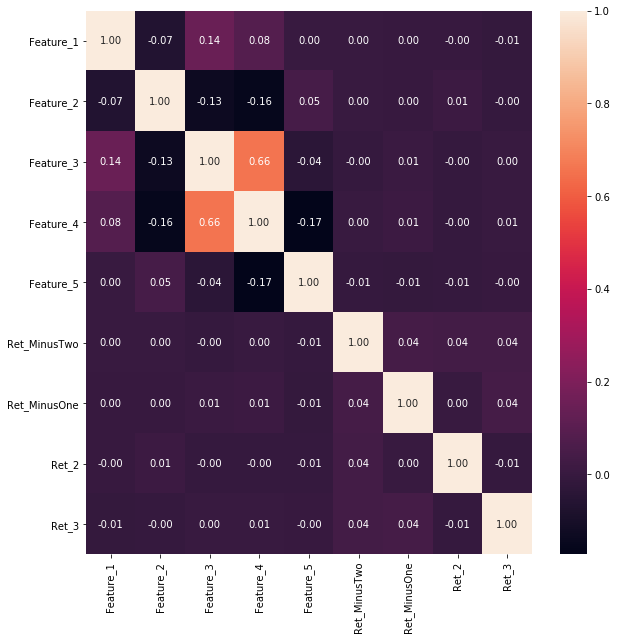

In [47]:
fig, axes = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=axes, annot=True, fmt='.2f')

## Feature Reduction / Selection

We will not do feature reduction or selection here, to keep things simple. This is also why we've only selected a subset of features for this workshop.

Once you've learnt about feature reduction and selection, you should try the techniques here. 

For example, consider applying PCA with the full set of features to reduce dimensions.

## Feature Scaling

We will perform feature scaling.

Before features can be scaled, we need to holdout (separate out) the test dataset from the training dataset. 

In [48]:
X = df.loc[:, features]
y = df.loc[:, target]

X.describe() # inspect the feature ranges

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Ret_MinusTwo,Ret_MinusOne,Ret_2
count,38755.000000,38755.000000,38755.000000,38755.000000,38755.000000,38755.000000,38755.000000,3.875500e+04
mean,0.607922,-0.122033,0.575866,0.418008,5.492633,0.000834,-0.000775,5.529006e-06
std,1.773299,1.177071,0.898429,0.763022,2.940678,0.028495,0.030867,9.484371e-04
min,0.000000,-3.440521,-4.643526,-5.440596,1.000000,-0.536283,-0.514720,-1.311777e-02
25%,0.000000,-0.930436,-0.089154,-0.069681,2.000000,-0.010682,-0.010900,-3.232862e-04
50%,0.000000,-0.371677,0.460276,0.420583,6.000000,0.000139,-0.000668,-1.980120e-07
75%,0.000000,0.426727,1.082768,0.926238,8.000000,0.011075,0.009077,3.154657e-04
max,10.000000,4.175150,4.530405,2.953163,10.000000,0.894024,0.852139,3.214902e-02


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape, X_test.shape)

(29066, 8) (9689, 8)


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Z_train = scaler.fit_transform(X_train)
Z_test = scaler.transform(X_test)

## Train Model

Let's try training a Linear Regression model, using Stochastic Gradient Descent.

We will perform cross-validation here as well, and plot the learning curve to see how our training went.

In [84]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve

estimator = SGDRegressor(random_state=42, tol=1e-3, max_iter=1000)

# since we have quite a large dataset, we can try smaller chunks of training sizes
# for smaller datasets, the default is okay
train_sizes=[0.01, 0.05, 0.10, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

sample_sizes, train_scores, val_scores = learning_curve(estimator, Z_train, y_train, cv=3,
                                                        train_sizes=train_sizes,
                                                        verbose=1, random_state=42)

[learning_curve] Training set sizes: [  193   968  1937  3875  5813  7750  9688 11626 13563 15501 17439 19377]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.2s finished


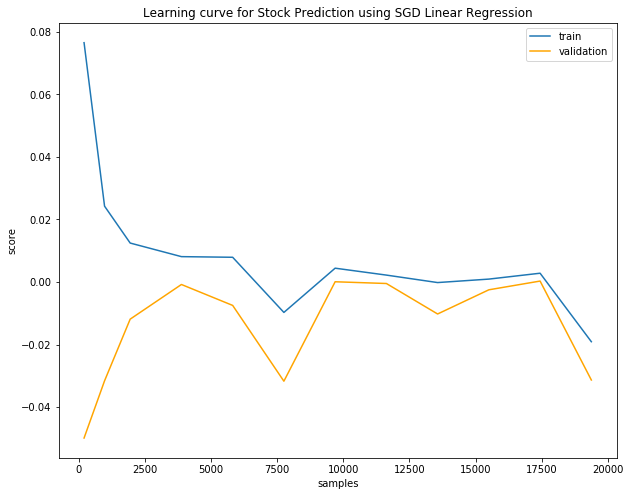

In [85]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(sample_sizes, train_scores.mean(axis=1), label='train')
ax.plot(sample_sizes, val_scores.mean(axis=1), color='orange', label='validation')
ax.set(xlabel='samples', ylabel='score', title='Learning curve for Stock Prediction using SGD Linear Regression')
ax.legend()

## Early Stopping

Looking at the learning curve, the model performs worse as training progresses.

Therefore, use a subset of training data to stop training early.

In [101]:
subset = 3000

Z_train_subset = Z_train[:subset]
y_train_subset = y_train[:subset]

model = SGDRegressor(random_state=42, tol=1e-3, max_iter=1000, verbose=True)
model.fit(Z_train_subset, y_train_subset)

# score on the test set
print(estimator.score(Z_test, y_test))

-- Epoch 1
Norm: 0.00, NNZs: 8, Bias: -0.000021, T: 3000, Avg. loss: 0.000001
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 8, Bias: -0.000016, T: 6000, Avg. loss: 0.000001
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 8, Bias: -0.000038, T: 9000, Avg. loss: 0.000001
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 8, Bias: -0.000026, T: 12000, Avg. loss: 0.000001
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 8, Bias: -0.000034, T: 15000, Avg. loss: 0.000001
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 8, Bias: -0.000028, T: 18000, Avg. loss: 0.000001
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds
-0.04089546662154442


In [102]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(Z_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 9.668973954148818e-07
R2: -0.04089546662154442


## Deployment and Prediction

In [ ]:
# save model for later use
import pickle

pickle.dump(scaler, open('01_stock_prediction_X_scaler.pickle', 'wb'))
pickle.dump(model, open('01_stock_predicton_model.pickle', 'wb'))

In [107]:
# load model in deployment

scaler1 = pickle.load(open('01_stock_prediction_X_scaler.pickle', 'rb'))
model1 = pickle.load(open('01_stock_predicton_model.pickle', 'rb'))

# imagine we have test data
test_data = X_test[:10]
test_targets = y_test[:10]

Z_test_data = scaler1.transform(test_data)
y_test_pred = model1.predict(Z_test_data)

print('Truth', test_targets.values)
print('Predictions', y_test_pred)

Truth [-4.78393710e-04 -2.90349636e-05  7.28220429e-04 -1.07156845e-04
  2.12802350e-04 -2.49679513e-05 -1.24300100e-05 -3.55287076e-04
  3.23024137e-04  2.07733386e-04]
Predictions [ 5.46658338e-07 -1.27032293e-05 -2.05933460e-05 -5.59806961e-05
 -7.77258291e-05 -2.55082231e-05  1.72258580e-06 -4.76386366e-05
  1.73671158e-05 -8.55272789e-06]


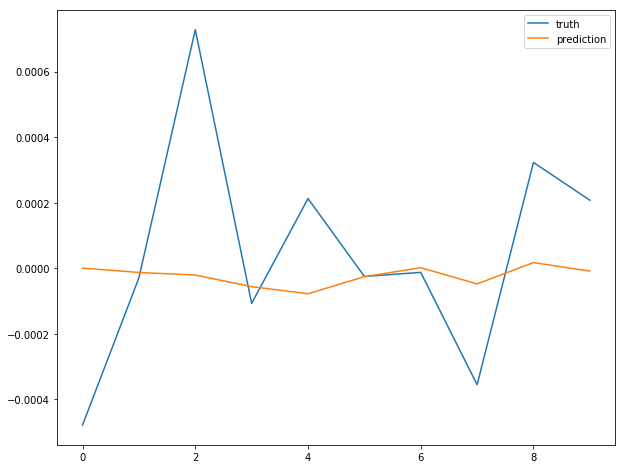

In [108]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(test_targets.values, label='truth')
ax.plot(y_test_pred, label='prediction')
ax.legend()

## What's next

So the result isn't good. This is expected for a few reasons:
* We've only selected a subset of features
* There can be better ways to modeling the return history, such as using statistical time series models (ARIMA family), or recurrent neural networks.
* A Linear Regression model is too naive, because it assumes a linear relationship between features and the target variable
* This is part of a Kaggle challenge, so it is not supposed to be easy.